##**Nasa Data Mine Project**
Name: Erik Thompson
Date: 7/23/2025
Purpose: Data mine Public Nasa Datasets for potential discovery of life or similar/hospital conditions for life on Earth like planets.
Sources: https://exoplanetarchive.ipac.caltech.edu
https://exoplanetarchive.ipac.caltech.edu/docs/data.html
https://api.nasa.gov
https://catalog.data.gov/organization/nasa-gov
https://earthdata.nasa.gov/
https://astroquery.readthedocs.io/en/latest/

In [ ]:
#Run one time
!pip install pandas
!pip install scikit-learn
!pip install seaborn
!pip install numpy
!pip install matplotlib

In [13]:
import pandas as pd

In [14]:
url = (
    "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?"
    "query=select+*+"
    "from+pscomppars&format=csv"
)
df = pd.read_csv(url)
print(df.shape)
print(df.columns.tolist())
# Show the first few rows
print(df[['pl_name', 'hostname', 'discoverymethod', 'pl_orbper', 'pl_rade']].head())

(5967, 682)
['objectid', 'pl_name', 'pl_letter', 'hostid', 'hostname', 'hd_name', 'hip_name', 'tic_id', 'disc_pubdate', 'disc_year', 'disc_method', 'discoverymethod', 'disc_locale', 'disc_facility', 'disc_instrument', 'disc_telescope', 'disc_refname', 'ra', 'raerr1', 'raerr2', 'rasymerr', 'rastr', 'ra_solnid', 'ra_reflink', 'dec', 'decerr1', 'decerr2', 'decsymerr', 'decstr', 'dec_solnid', 'dec_reflink', 'glon', 'glonerr1', 'glonerr2', 'glonsymerr', 'glonstr', 'glon_solnid', 'glon_reflink', 'glat', 'glaterr1', 'glaterr2', 'glatsymerr', 'glatstr', 'glat_solnid', 'glat_reflink', 'elon', 'elonerr1', 'elonerr2', 'elonsymerr', 'elonstr', 'elon_solnid', 'elon_reflink', 'elat', 'elaterr1', 'elaterr2', 'elatsymerr', 'elat_solnid', 'elat_reflink', 'elatstr', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbpersymerr', 'pl_orbperlim', 'pl_orbperstr', 'pl_orbperformat', 'pl_orbper_solnid', 'pl_orbper_reflink', 'pl_orblpererr1', 'pl_orblper', 'pl_orblpererr2', 'pl_orblpersymerr', 'pl_orblperli

In [7]:
# How many exoplanets by discovery method?
methods = df['discoverymethod'].value_counts()
print(methods)

# Basic stats on radius and orbit
print(df[['pl_rade', 'pl_orbper']].describe())

discoverymethod
Transit                          34912
Radial Velocity                   2632
Microlensing                       715
Transit Timing Variations          158
Imaging                            151
Eclipse Timing Variations           24
Orbital Brightness Modulation       21
Pulsar Timing                       13
Astrometry                           5
Pulsation Timing Variations          2
Disk Kinematics                      1
Name: count, dtype: int64
           pl_rade     pl_orbper
count  26675.00000  3.542100e+04
mean       5.42624  1.233085e+04
std       72.35046  2.137213e+06
min        0.27000  9.070629e-02
25%        1.55000  4.411939e+00
50%        2.29000  1.035350e+01
75%        3.23000  2.662950e+01
max     4282.98000  4.020000e+08


Notes: Primary two discovery methods are Transit and Radial Velocity. Transit means the planet passed in front of the star and dip in brightness is used to measure planets. Radial Velocity (Doppler Spectroscopy) is when a planet causes star to wobble and shift star's light due to Doppler effect.

Count 26675 means there are 26,675 exoplanets that have a known radius value. *(rade means radius of porportion of Earth in number of sizes of Earth 1.0 means Earth sized). 3.542e04 means 35,421 exoplanets with known orbit distance. *(Orbper means Orbit period or time in Earth days for orbit of star).

Mean of 5.4 means most exoplanets are much larger than Earth and probably gas giants. Mean of 1.233e04 means average orbital period of 33.8 years, a much longer oribt than stars.

In [15]:
import matplotlib.pyplot as plt

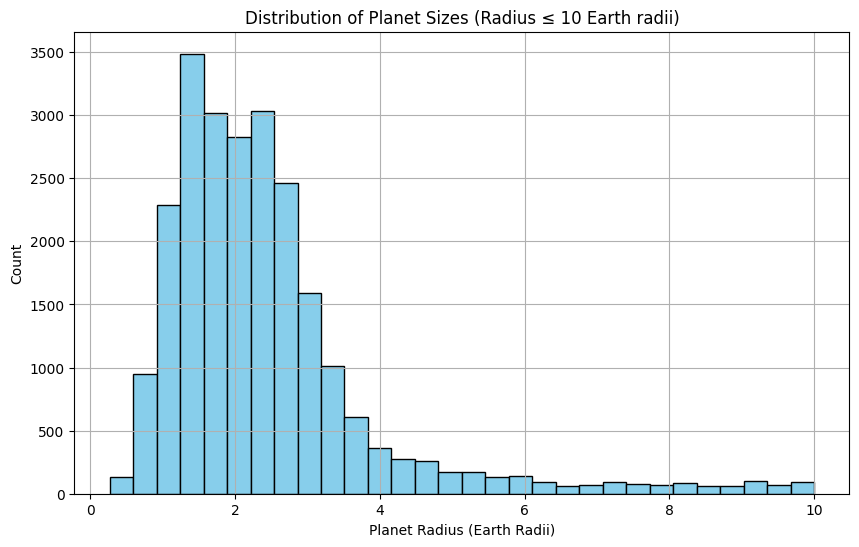

In [6]:
# Select only the columns we need
df_subset = df[['pl_rade', 'pl_orbper']]

# Drop rows with missing or invalid values
df_clean = df_subset.dropna()
# Assuming df is DataFrame with 'pl_rade' column
planet_sizes = df['pl_rade'].dropna()

# Filter to focus on planets with radius <= 10 Earth radii
filtered_sizes = planet_sizes[planet_sizes <= 10]

plt.figure(figsize=(10,6))
plt.hist(filtered_sizes, bins=30, color='skyblue', edgecolor='black')

plt.title('Distribution of Planet Sizes (Radius ≤ 10 Earth radii)')
plt.xlabel('Planet Radius (Earth Radii)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

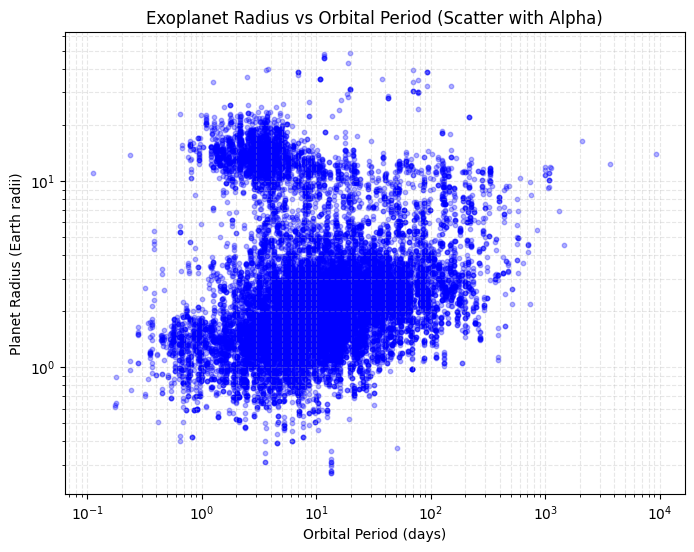

In [7]:

# Filter to positive and reasonably bounded values
df_clean_pos = df_clean[
    (df_clean['pl_orbper'] > 0.1) &  # orbital period > 0.1 days
    (df_clean['pl_orbper'] < 1e4) &  # orbital period < 10,000 days
    (df_clean['pl_rade'] > 0.1) &    # planet radius > 0.1 Earth radii
    (df_clean['pl_rade'] < 50)       # exclude extreme outliers
]
plt.figure(figsize=(8,6))
plt.scatter(
    df_clean_pos['pl_orbper'], df_clean_pos['pl_rade'],
    alpha=0.3, s=10, c='blue'
)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Planet Radius (Earth radii)')
plt.title('Exoplanet Radius vs Orbital Period (Scatter with Alpha)')
plt.grid(True, which='both', ls='--', alpha=0.3)
plt.show()

Notebook Organization: Beginning of Earth like discovery. 

In [5]:

earth_like = df[
    (df['pl_rade'] >= 0.8) & (df['pl_rade'] <= 1.5) &
    (df['pl_orbper'] >= 200) & (df['pl_orbper'] <= 400)
]

print(f"Found {len(earth_like)} Earth-like candidates out of {len(df)}")
print(earth_like[['pl_name', 'hostname', 'pl_rade', 'pl_orbper']])

Found 10 Earth-like candidates out of 38634
            pl_name    hostname  pl_rade   pl_orbper
301    Kepler-452 b  Kepler-452    1.130  384.843022
483     Kepler-62 f   Kepler-62    1.430  267.282521
3308    Kepler-62 f   Kepler-62    1.420  267.283301
5444    Kepler-62 f   Kepler-62    1.410  267.291000
8791    Kepler-62 f   Kepler-62    1.420  267.283301
10000   Kepler-62 f   Kepler-62    1.461  267.290000
22203  Kepler-452 b  Kepler-452    1.500  384.843022
24795  Kepler-452 b  Kepler-452    1.090  384.847556
27741   Kepler-62 f   Kepler-62    1.460  267.283301
36606   Kepler-62 f   Kepler-62    1.420  267.283301


Notes: Out of the tens of thousands of discovered exoplanets only two are earth like: Kepler-452 b and Kepler-62 f. This means chance of earth like planet is 1/40,000 exoplanets as an optimistic estimate.



In [7]:
kepler452b = earth_like.iloc[0]
print(f"Kepler-452 b's planet temperature: {kepler452b['pl_eqt']}K\n"
      f"Star temperature: {kepler452b['st_teff']}K\n"
      f"Discovery method: {kepler452b['discoverymethod']}")
def percent_difference(a, b):
    diff = abs(a - b) / ((a + b) / 2) * 100
    return round(diff, 3)
sun_temp = 5778
earth_temp= 255
print(f"\nEarth's planet equilibrium temperature: {earth_temp}K\n"
      f"{percent_difference(kepler452b['pl_eqt'], earth_temp)}% different from Earth\n",
      f"The Sun temperature: {sun_temp}K\n",
      f"{percent_difference(kepler452b['st_teff'], sun_temp)}% different from Earth\n")

kepler62f = earth_like.iloc[1]
print(f"Kepler-62 f's planet temperature: {kepler62f['pl_eqt']}K\n"
      f"Star temperature: {kepler62f['st_teff']}K\n"
      f"Discovery method: {kepler62f['discoverymethod']}")
def percent_difference(a, b):
    diff = abs(a - b) / ((a + b) / 2) * 100
    return round(diff, 3)
sun_temp = 5778
earth_temp= 255
print(f"\nEarth's planet equilibrium temperature: {earth_temp}K\n"
      f"{percent_difference(kepler62f['pl_eqt'], earth_temp)}% different from Earth\n",
      f"The Sun temperature: {sun_temp}K\n",
      f"{percent_difference(kepler62f['st_teff'], sun_temp)}% different from Earth\n")

Kepler-452 b's planet temperature: 220.0K
Star temperature: 5578.0K
Discovery method: Transit

Earth's planet equilibrium temperature: 255K
14.737% different from Earth
 The Sun temperature: 5778K
 3.522% different from Earth

Kepler-62 f's planet temperature: 207.0K
Star temperature: 4926.0K
Discovery method: Transit

Earth's planet equilibrium temperature: 255K
20.779% different from Earth
 The Sun temperature: 5778K
 15.919% different from Earth



In [61]:
#Data engineering a clean copy set.
df_subset = df[['pl_bmasse', 'pl_rade', 'pl_eqt']].dropna()
df_clean = df_subset[(df_subset['pl_bmasse'] > 0) & (df_subset['pl_rade'] > 0)].copy()

In [62]:
#Compute Gravity constant m/s^2
# Constants
earth_radius_m = 6.371e6     # meters
earth_mass_kg = 5.972e24     # kg

# Convert planet mass and radius to SI units
mass_kg = df_clean['pl_bmasse'] * earth_mass_kg
radius_m = df_clean['pl_rade'] * earth_radius_m

# Calculate gravity with G included (m/s²)
G = 6.67430e-11  # gravitational constant, m³/kg/s²

df_clean['gravity'] = G * mass_kg / (radius_m ** 2)

In [69]:
#Debug check values.
df_clean['gravity'].head()

1      26.100029
29      8.588377
107    10.670812
111     7.679226
114    12.090035
Name: gravity, dtype: float64

In [70]:
#Compute Farenheit temperature column
df_clean['pl_eqt_F'] = (df_clean['pl_eqt'] - 273.15) * 9/5 + 32
df_clean['pl_eqt_F'] = df_clean['pl_eqt_F'].round(2)

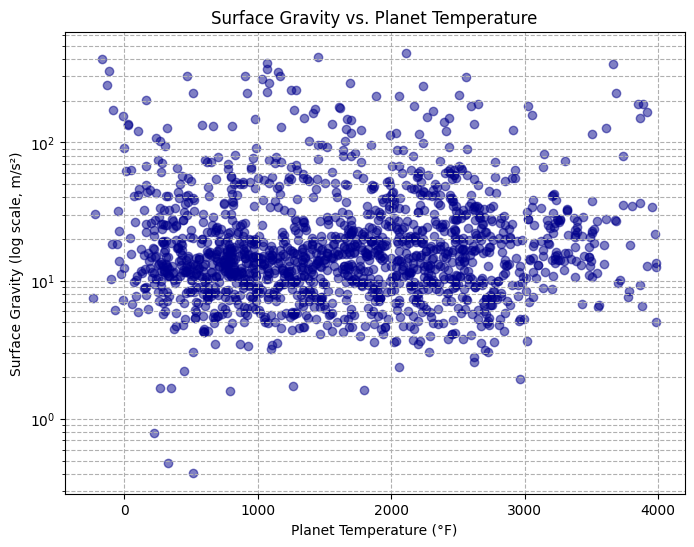

In [71]:

# Drop rows with missing values just in case
df_plot = df_clean.copy()
df_plot = df_plot[['gravity', 'pl_eqt_F']].dropna()
df_plot = df_plot[(df_plot['gravity'] <= 500) & (df_plot['pl_eqt_F'] <= 4000)]
df_filtered = df_plot
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(df_filtered['pl_eqt_F'], df_filtered['gravity'], alpha=0.5, color='darkblue')
plt.yscale('log')
plt.xlabel('Planet Temperature (°F)')
plt.ylabel('Surface Gravity (log scale, m/s²)')
plt.title('Surface Gravity vs. Planet Temperature')
plt.grid(True, which='both', linestyle='--')
plt.show()

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
df_clean.head()

,pl_bmasse,pl_rade,pl_eqt,gravity,pl_eqt_F
1,20.10000,2.750000,369.0,26.100029,204.53
29,123.00021,11.859122,1001.0,8.588377,1342.13
107,8.17000,2.742000,596.0,10.670812,613.13
111,233.92288,17.295487,1955.0,7.679226,3059.33
114,281.91521,15.132150,1410.0,12.090035,2078.33


In [108]:
# Pick Earth-relevant features
features = ['pl_bmasse', 'pl_rade', 'pl_eqt_F', 'gravity']
df_cluster = df_clean.copy()
df_cluster = df_cluster[features].dropna()
df_cluster = df_cluster[(df_cluster['gravity'] <= 100) & (df_cluster['pl_eqt_F'] <= 3000)]
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

In [113]:
# DBSCAN clustering
dbscan = DBSCAN(eps=0.10, min_samples=4)  # Tune eps & min_samples as needed
labels = dbscan.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df_cluster['cluster'] = labels

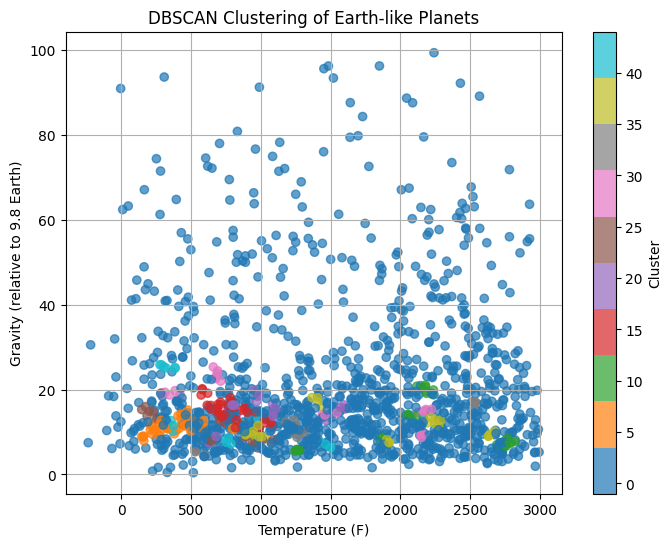

In [114]:

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    df_cluster['pl_eqt_F'], df_cluster['gravity'],
    c=df_cluster['cluster'], cmap='tab10', alpha=0.7
)
plt.xlabel('Temperature (F)')
plt.ylabel('Gravity (relative to 9.8 Earth)')
plt.title('DBSCAN Clustering of Earth-like Planets')
plt.grid(True)
plt.colorbar(scatter, label='Cluster')
plt.show()

In [128]:
earth_like = df_cluster[(df_cluster['cluster'] >=4) & (df_cluster['cluster'] <= 8)]
earth_like = earth_like[(earth_like['pl_eqt_F'] >=-100) & (earth_like['pl_eqt_F'] <= 250)]
earth_like.head()
earth_like.describe()

,pl_bmasse,pl_rade,pl_eqt_F,gravity,cluster
count,9.000000,9.000000,9.000000,9.000000,9.0
mean,3.807778,1.916778,193.110000,9.793109,4.0
std,1.621911,0.342245,34.243683,1.242556,0.0
min,2.100000,1.510000,148.910000,7.940342,4.0
25%,2.680000,1.582000,161.330000,8.907742,4.0
50%,3.300000,1.980000,209.570000,9.535925,4.0
75%,4.700000,2.133000,220.730000,10.515554,4.0
max,7.240000,2.470000,236.930000,11.653462,4.0


In [129]:
print(f'Number of Earth Like: {len(earth_like)}')

Number of Earth Like: 9


Orange Cluster 4 to 8 has lower equilibrium temperatures and lower gravity (Earth is 9.8 m/s^2) and comparable to Earth. 
Consider for habitability and colonization. Manually filtered temperature from -100 to 250 Farenheit. Earth's equilibrium is 0 degree Farenheit for reference. These 9 Earth-like planets are much hotter but close enough to Earth gravity. 

Notebook Organization: End of Earth like discovery. Beginning of planet type clustering

In [13]:
#DBSCAN clustering techniques for determing planet type. 
features = ['pl_rade', 'pl_bmasse', 'pl_eqt']
df_cluster = df[features].dropna()

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

In [18]:
db = DBSCAN(eps=0.2, min_samples=25)
labels = db.fit_predict(X_scaled)

In [27]:
#After making chart and clustering went back and labeled accordingly.
df_cluster['cluster'] = labels
df_cluster['cluster'] = df_cluster['cluster'].map({
    -1: 'Noise',
     1: 'Gas Giants',
     0: 'Super-Earths',
     2: 'Ice Giants'
})

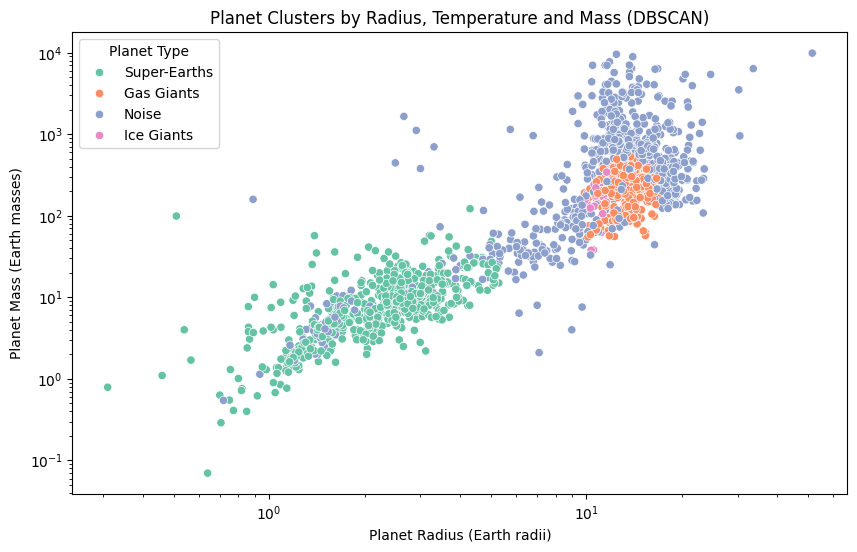

In [29]:
plt.figure(figsize=(10, 6))
# Change cluster label names

sns.scatterplot(
    x='pl_rade', y='pl_bmasse',
    hue='cluster', data=df_cluster,
    palette='Set2'
)
plt.legend(title='Planet Type')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Planet Radius (Earth radii)')
plt.ylabel('Planet Mass (Earth masses)')
plt.title('Planet Clusters by Radius, Temperature and Mass (DBSCAN)')



plt.show()

Cluster 0 is Super-Earths and Rocky Planets like Mars and Earth. Rocky planets heavier than Earth but lighter than Neptune — not gas giants. Radius 1.0 - 2.5x Earth and Mass 1.0 - 20.0x Earth size. 

Cluster 1 is Gas Giants, and Sub-Giants / Jovian Planets. They have mass > 30x Earth and Radius > 6x Earth. Massive planets made mostly of Hydrogen and Helium E.G. Saturn and Jupiter. Intermediate gas-rich planets, possibly inflated or young. 

Cluster 2 is Ice Giants with lower temperature than Gas Giants cluster 1. Rich in water, ammonia, and methane ices (e.g., Uranus, Neptune).

 Characteristics of Gas/Ice Giants
Thick atmospheres (mostly hydrogen/helium)
Low density compared to their mass (because they are not solid)
Usually detected via transit or radial velocity methods

Notebook Organization: End of planet type clustering

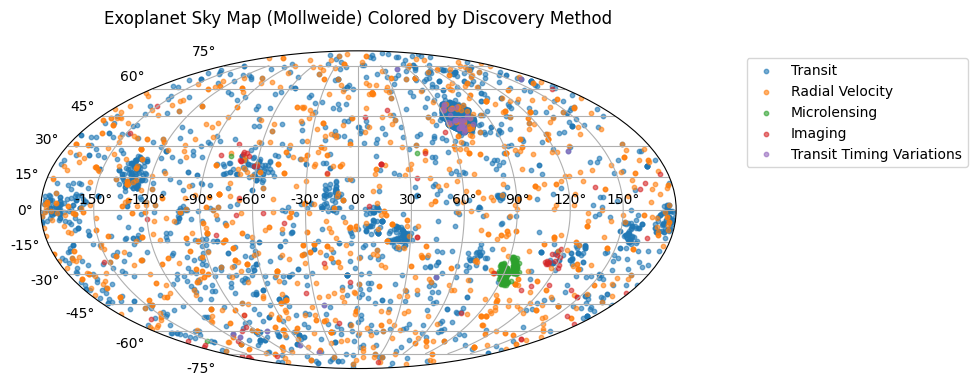

In [21]:
import numpy as np
# Drop rows with missing coordinates or discovery methods
df_clean = df.dropna(subset=['ra', 'dec', 'discoverymethod'])

# Convert RA (degrees) to radians and shift for Mollweide projection
# RA is from 0 to 360, but Mollweide spans -180 to +180, so we shift and wrap it
ra_rad = np.radians(360 - df_clean['ra'])  # flip for sky map convention
ra_rad = np.where(ra_rad > np.pi, ra_rad - 2*np.pi, ra_rad)  # wrap around
dec_rad = np.radians(df_clean['dec'])

# Limit to most common discovery methods to avoid clutter
top_methods = df_clean['discoverymethod'].value_counts().nlargest(5).index
df_plot = df_clean[df_clean['discoverymethod'].isin(top_methods)]
ra_rad_plot = ra_rad[df_clean['discoverymethod'].isin(top_methods)]
dec_rad_plot = dec_rad[df_clean['discoverymethod'].isin(top_methods)]

# Create Mollweide sky map
plt.figure(figsize=(10, 6))
ax = plt.subplot(111, projection='mollweide')

# Map discovery methods to colors
for method in top_methods:
    mask = df_plot['discoverymethod'] == method
    ax.scatter(
        ra_rad_plot[mask], dec_rad_plot[mask],
        label=method, s=10, alpha=0.6
    )

ax.grid(True)
ax.set_title("Exoplanet Sky Map (Mollweide) Colored by Discovery Method", pad=20)
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.tight_layout()
plt.show()

Two clusters at -60 degrees and 45 degrees, -90 degrees and -30 degrees are Kepler and TESS survey regions. 

Cluster of Transit and Transit timing variations is Kepler space telescope. Other clusters are Transiting Exoplanet Survey Satellite (TESS) (Transit methodology) and Direct Imaging Missions for imaging.

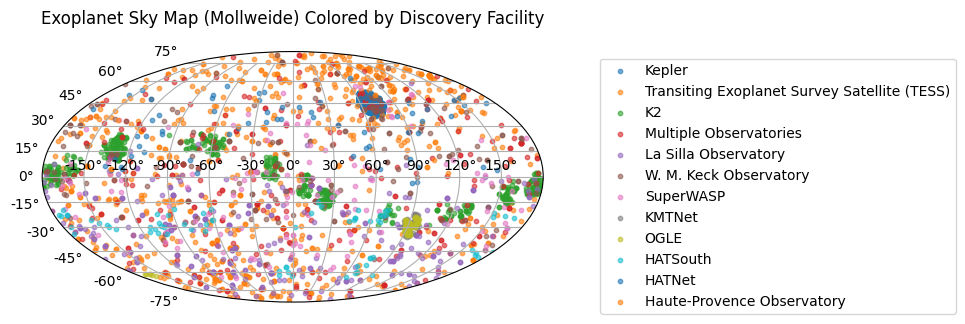

In [24]:
# Drop rows with missing coordinates or discovery methods
df_clean = df.dropna(subset=['ra', 'dec', 'disc_facility'])

# Convert RA (degrees) to radians and shift for Mollweide projection
# RA is from 0 to 360, but Mollweide spans -180 to +180, so we shift and wrap it
ra_rad = np.radians(360 - df_clean['ra'])  # flip for sky map convention
ra_rad = np.where(ra_rad > np.pi, ra_rad - 2*np.pi, ra_rad)  # wrap around
dec_rad = np.radians(df_clean['dec'])

# Limit to most common discovery methods to avoid clutter
top_methods = df_clean['disc_facility'].value_counts().nlargest(12).index
df_plot = df_clean[df_clean['disc_facility'].isin(top_methods)]
ra_rad_plot = ra_rad[df_clean['disc_facility'].isin(top_methods)]
dec_rad_plot = dec_rad[df_clean['disc_facility'].isin(top_methods)]

# Create Mollweide sky map
plt.figure(figsize=(10, 6))
ax = plt.subplot(111, projection='mollweide')

# Map discovery methods to colors
for method in top_methods:
    mask = df_plot['disc_facility'] == method
    ax.scatter(
        ra_rad_plot[mask], dec_rad_plot[mask],
        label=method, s=10, alpha=0.6
    )

ax.grid(True)
ax.set_title("Exoplanet Sky Map (Mollweide) Colored by Discovery Facility", pad=20)
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.tight_layout()
plt.show()

Kepler Space Telescope discovered the most exoplanets followed by TESS and K2 (Kepler 2 extended mission).